In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import cv2

In [2]:
import cv2
from PIL import Image

class Expand(object):

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image = sample.numpy()
        h, w = image.shape[1], image.shape[2]
        expand_s = self.output_size
        background = np.zeros((1, expand_s, expand_s))
        rnd_x = np.random.randint(expand_s-w, size=1)[0]
        rnd_y = np.random.randint(expand_s-h, size=1)[0]
        background[:,rnd_x:rnd_x+w,rnd_y:rnd_y+h] = image
        return torch.from_numpy(background)

In [3]:
transform = transforms.Compose(
                [transforms.ToTensor(),
                 transforms.Resize(25),
                 Expand(28),
                 transforms.Normalize((0.5), (0.5))])

In [4]:
classes = []
classes.append(chr(48))
for i in range(65, 91):
    classes.append(chr(i))
classes.append(chr(90))
classes.append(chr(90))
classes.append(chr(90))

In [5]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 25, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(25, 50, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(50*4*4, 384)
        self.fc2 = nn.Linear(384, 128)
        self.fc3 = nn.Linear(128, 27)
#         self.fc4 = nn.Linear(64, 27)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
#         print(x.size())
        x = x.view(-1, 50*4*4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
#         x = F.relu(self.fc3(x))
#         x = self.fc4(x)
        x = self.fc3(x)
        return x

net = Net()

In [6]:
PATH = './model_letters_best.pth'
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [7]:
from PIL import Image


def image_loader(s, i,x=0, y=0,w=1000,h=1000):
#     image = cv2.imread(f'./img/test_image_{i}.png',cv2.IMREAD_GRAYSCALE)
    if s == 1 or s == 2 or s == 5:
        image = cv2.imread(f'./img/testset/test_image_set{s}/test_image_{i}.png' ,cv2.IMREAD_GRAYSCALE)
    else:
        image = cv2.imread(f'./img/testset/test_image_set{s}/test_image_{i}.jpg' ,cv2.IMREAD_GRAYSCALE)
    if not s == 5:
        image = cv2.bitwise_not(image) # <--- this is for test set only (invert image)
    image = np.fliplr(image)
    image = np.rot90(image, axes=(0,1))
    image = image[y:y+h, x:x+w]
    image = cv2.resize(image, (28,28))
    
#     plt.imshow(image)
#     plt.show()
    
    image = Image.fromarray(image)
    image = transform(image)
    return image

img = image_loader(1,1)
img.size()

torch.Size([1, 28, 28])

## handwritten lower case letters (cropped)

In [8]:
images = []
true_count = 0
for idx in range(28):
    images.append(image_loader(1,idx+1))
    
    if (idx+1)%4 == 0:
        images = torch.stack(images)
        outputs = net(images.float())
        _, predicted = torch.max(outputs, 1)
        for j in range(4):
            pred = classes[predicted[j]-1]
            act = classes[idx+j-3]
            print('Predicted: ',pred, "   Acutal: ", act, " ---- ", pred==act)
            if pred==act: true_count += 1
            
        images = []
acc = 100*(true_count-2)/26
print("accuracy = ", acc)

Predicted:  0    Acutal:  0  ----  True
Predicted:  A    Acutal:  A  ----  True
Predicted:  B    Acutal:  B  ----  True
Predicted:  C    Acutal:  C  ----  True
Predicted:  D    Acutal:  D  ----  True
Predicted:  E    Acutal:  E  ----  True
Predicted:  I    Acutal:  F  ----  False
Predicted:  G    Acutal:  G  ----  True
Predicted:  H    Acutal:  H  ----  True
Predicted:  I    Acutal:  I  ----  True
Predicted:  J    Acutal:  J  ----  True
Predicted:  H    Acutal:  K  ----  False
Predicted:  L    Acutal:  L  ----  True
Predicted:  G    Acutal:  M  ----  False
Predicted:  I    Acutal:  N  ----  False
Predicted:  O    Acutal:  O  ----  True
Predicted:  P    Acutal:  P  ----  True
Predicted:  X    Acutal:  Q  ----  False
Predicted:  R    Acutal:  R  ----  True
Predicted:  S    Acutal:  S  ----  True
Predicted:  T    Acutal:  T  ----  True
Predicted:  U    Acutal:  U  ----  True
Predicted:  V    Acutal:  V  ----  True
Predicted:  W    Acutal:  W  ----  True
Predicted:  X    Acutal:  X  ----  

## handwritten lower case letters (thick line)

In [9]:
images = []
true_count = 0
for idx in range(28):
    images.append(image_loader(3,idx+1))
    
    if (idx+1)%4 == 0:
        images = torch.stack(images)
        outputs = net(images.float())
        _, predicted = torch.max(outputs, 1)
        for j in range(4):
            pred = classes[predicted[j]]
            act = classes[idx+j-2]
            print('Predicted: ',pred, "   Acutal: ", act, " ---- ", pred==act)
            if pred==act: true_count += 1
            
        images = []
acc = 100*(true_count-2)/26
print("accuracy = ", acc)

Predicted:  A    Acutal:  A  ----  True
Predicted:  B    Acutal:  B  ----  True
Predicted:  C    Acutal:  C  ----  True
Predicted:  D    Acutal:  D  ----  True
Predicted:  E    Acutal:  E  ----  True
Predicted:  T    Acutal:  F  ----  False
Predicted:  G    Acutal:  G  ----  True
Predicted:  H    Acutal:  H  ----  True
Predicted:  I    Acutal:  I  ----  True
Predicted:  J    Acutal:  J  ----  True
Predicted:  H    Acutal:  K  ----  False
Predicted:  I    Acutal:  L  ----  False
Predicted:  M    Acutal:  M  ----  True
Predicted:  N    Acutal:  N  ----  True
Predicted:  O    Acutal:  O  ----  True
Predicted:  P    Acutal:  P  ----  True
Predicted:  Q    Acutal:  Q  ----  True
Predicted:  I    Acutal:  R  ----  False
Predicted:  S    Acutal:  S  ----  True
Predicted:  C    Acutal:  T  ----  False
Predicted:  U    Acutal:  U  ----  True
Predicted:  V    Acutal:  V  ----  True
Predicted:  W    Acutal:  W  ----  True
Predicted:  X    Acutal:  X  ----  True
Predicted:  Y    Acutal:  Y  ----  

## handwritten uppercase letters (cropped)

In [10]:
images = []
true_count = 0
for idx in range(28):
    images.append(image_loader(2,idx+1))
    
    if (idx+1)%4 == 0:
        images = torch.stack(images)
        outputs = net(images.float())
        _, predicted = torch.max(outputs, 1)
        for j in range(4):
            pred = classes[predicted[j]-1]
            act = classes[idx+j-3]
            print('Predicted: ',pred, "   Acutal: ", act, " ---- ", pred==act)
            if pred==act: true_count += 1
            
        images = []
acc = 100*(true_count-2)/26
print("accuracy = ", acc)

Predicted:  0    Acutal:  0  ----  True
Predicted:  A    Acutal:  A  ----  True
Predicted:  B    Acutal:  B  ----  True
Predicted:  C    Acutal:  C  ----  True
Predicted:  D    Acutal:  D  ----  True
Predicted:  E    Acutal:  E  ----  True
Predicted:  F    Acutal:  F  ----  True
Predicted:  G    Acutal:  G  ----  True
Predicted:  H    Acutal:  H  ----  True
Predicted:  I    Acutal:  I  ----  True
Predicted:  J    Acutal:  J  ----  True
Predicted:  K    Acutal:  K  ----  True
Predicted:  L    Acutal:  L  ----  True
Predicted:  M    Acutal:  M  ----  True
Predicted:  N    Acutal:  N  ----  True
Predicted:  O    Acutal:  O  ----  True
Predicted:  T    Acutal:  P  ----  False
Predicted:  Q    Acutal:  Q  ----  True
Predicted:  B    Acutal:  R  ----  False
Predicted:  S    Acutal:  S  ----  True
Predicted:  T    Acutal:  T  ----  True
Predicted:  U    Acutal:  U  ----  True
Predicted:  T    Acutal:  V  ----  False
Predicted:  W    Acutal:  W  ----  True
Predicted:  X    Acutal:  X  ----  Tr

## handwritten uppercase letters (thick line)

In [11]:
images = []
true_count = 0
for idx in range(28):
    images.append(image_loader(4,idx+1))
    
    if (idx+1)%4 == 0:
        images = torch.stack(images)
        outputs = net(images.float())
        _, predicted = torch.max(outputs, 1)
        for j in range(4):
            pred = classes[predicted[j]]
            act = classes[idx+j-2]
            print('Predicted: ',pred, "   Acutal: ", act, " ---- ", pred==act)
            if pred==act: true_count += 1
            
        images = []
acc = 100*(true_count-2)/26
print("accuracy = ", acc)

Predicted:  A    Acutal:  A  ----  True
Predicted:  B    Acutal:  B  ----  True
Predicted:  C    Acutal:  C  ----  True
Predicted:  D    Acutal:  D  ----  True
Predicted:  E    Acutal:  E  ----  True
Predicted:  F    Acutal:  F  ----  True
Predicted:  G    Acutal:  G  ----  True
Predicted:  H    Acutal:  H  ----  True
Predicted:  I    Acutal:  I  ----  True
Predicted:  J    Acutal:  J  ----  True
Predicted:  K    Acutal:  K  ----  True
Predicted:  L    Acutal:  L  ----  True
Predicted:  M    Acutal:  M  ----  True
Predicted:  N    Acutal:  N  ----  True
Predicted:  O    Acutal:  O  ----  True
Predicted:  P    Acutal:  P  ----  True
Predicted:  Q    Acutal:  Q  ----  True
Predicted:  R    Acutal:  R  ----  True
Predicted:  S    Acutal:  S  ----  True
Predicted:  T    Acutal:  T  ----  True
Predicted:  U    Acutal:  U  ----  True
Predicted:  V    Acutal:  V  ----  True
Predicted:  W    Acutal:  W  ----  True
Predicted:  X    Acutal:  X  ----  True
Predicted:  Y    Acutal:  Y  ----  True


## screenshot images from EMNIST

In [12]:
images = []
true_count = 0
for idx in range(28):
    images.append(image_loader(5, idx+1))
    
    if (idx+1)%4 == 0:
        images = torch.stack(images)
        outputs = net(images.float())
        _, predicted = torch.max(outputs, 1)
        for j in range(4):
            pred = classes[predicted[j]]
            act = classes[idx+j-2]
            print('Predicted: ',pred, "   Acutal: ", act, " ---- ", pred==act)
            if pred==act: true_count += 1
            
        images = []
acc = 100*(true_count-2)/26
print("accuracy = ", acc)

Predicted:  A    Acutal:  A  ----  True
Predicted:  B    Acutal:  B  ----  True
Predicted:  C    Acutal:  C  ----  True
Predicted:  D    Acutal:  D  ----  True
Predicted:  E    Acutal:  E  ----  True
Predicted:  F    Acutal:  F  ----  True
Predicted:  G    Acutal:  G  ----  True
Predicted:  H    Acutal:  H  ----  True
Predicted:  L    Acutal:  I  ----  False
Predicted:  J    Acutal:  J  ----  True
Predicted:  K    Acutal:  K  ----  True
Predicted:  L    Acutal:  L  ----  True
Predicted:  M    Acutal:  M  ----  True
Predicted:  N    Acutal:  N  ----  True
Predicted:  O    Acutal:  O  ----  True
Predicted:  P    Acutal:  P  ----  True
Predicted:  I    Acutal:  Q  ----  False
Predicted:  R    Acutal:  R  ----  True
Predicted:  S    Acutal:  S  ----  True
Predicted:  T    Acutal:  T  ----  True
Predicted:  U    Acutal:  U  ----  True
Predicted:  V    Acutal:  V  ----  True
Predicted:  W    Acutal:  W  ----  True
Predicted:  X    Acutal:  X  ----  True
Predicted:  Y    Acutal:  Y  ----  Tru

## User Inputs and Tests

In [13]:
# PATH = './model_user_input.pth'
# net = Net()
# net.load_state_dict(torch.load(PATH))

In [14]:
def imshow(img):
    img = img / 2 + 0.5 
    npimg = img.numpy()
    # mirror image and rotate
    npimg = np.fliplr(npimg)
    npimg = np.rot90(npimg, axes=(-1,-2))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [15]:
from torch.utils.data import Dataset
import os 
import natsort
import cv2
from PIL import Image

class UserImageDataSet(Dataset):
    def __init__(self, root_dir, transform):
        self.root_dir = root_dir
        self.transform = transform
        all_imgs = os.listdir(root_dir)
        self.total_imgs = natsort.natsorted(all_imgs)

    def __len__(self):
        return len(self.total_imgs)

    def __getitem__(self, idx):
        label = idx+1
        path = f"{self.root_dir}/test_image_{chr(idx+65)}.png"
        while not os.path.isfile(path):
            path = f"{self.root_dir}/test_image_{chr(label+65)}.png"
            label += 1
        image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        image = np.rot90(image, axes=(0,1))
        image = cv2.resize(image, (28,28))
        image = Image.fromarray(image)
        image = transform(image)
        return image, torch.tensor(label)

In [16]:
from torchvision import datasets
img_folder_path = './img/user_input'
user_dataset = UserImageDataSet(img_folder_path, transform=transform)
user_loader = torch.utils.data.DataLoader(user_dataset , batch_size=26, shuffle=False, num_workers=0)

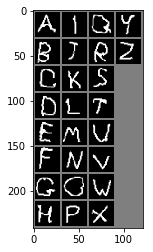

Predicted:      A     B     D     D     E     F     G     H     L     J     K     L     M     N     O     P     Q     R     S     T     U     V     W     X     Y     Z
GroundTruth:      A     B     C     D     E     F     G     H     I     J     K     L     M     N     O     P     Q     R     S     T     U     V     W     X     Y     Z
accuracy =  92.3076923076923


In [17]:
dataiter = iter(user_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

outputs = net(images.float())
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(26)))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(26)))

acc = 0
for i, pred in enumerate(predicted):
    if classes[i+1] == classes[pred]: acc+=1
print('accuracy = ', acc*100/26)

In [18]:
img_folder_path = './img/user_test'
user_testset = UserImageDataSet(img_folder_path, transform=transform)
user_test_loader = torch.utils.data.DataLoader(user_testset , batch_size=26, shuffle=False, num_workers=0)

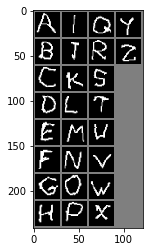

Predicted:      A     B     C     D     E     F     G     H     L     I     K     L     M     N     O     P     Q     R     S     T     H     V     W     X     Y     Z
GroundTruth:      A     B     C     D     E     F     G     H     I     J     K     L     M     N     O     P     Q     R     S     T     U     V     W     X     Y     Z
accuracy =  88.46153846153847


In [19]:
dataiter = iter(user_test_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

outputs = net(images.float())
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(26)))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(26)))

acc = 0
for i, pred in enumerate(predicted):
    if classes[i+1] == classes[pred]: acc+=1
print('accuracy = ', acc*100/26)